In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [4]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [5]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [6]:
df['rectal_temp'].fillna(np.mean(df['rectal_temp']),inplace=True)
df['pulse'].fillna(np.mean(df['pulse']),inplace=True)
df['respiratory_rate'].fillna(np.mean(df['respiratory_rate']),inplace=True)
df['nasogastric_reflux_ph'].fillna(np.mean(df['nasogastric_reflux_ph']),inplace=True)
df['packed_cell_volume'].fillna(np.mean(df['packed_cell_volume']),inplace=True)
df['total_protein'].fillna(np.mean(df['total_protein']),inplace=True)
df['abdomo_protein'].fillna(np.mean(df['abdomo_protein']),inplace=True)


In [7]:
df['temp_of_extremities'].fillna(df['temp_of_extremities'].mode().values[0],inplace=True)
df['peripheral_pulse'].fillna(df['peripheral_pulse'].mode().values[0],inplace=True)
df['mucous_membrane'].fillna(df['mucous_membrane'].mode().values[0],inplace=True)
df['capillary_refill_time'].fillna(df['capillary_refill_time'].mode().values[0],inplace=True)
df['pain'].fillna(df['pain'].mode().values[0],inplace=True)
df['peristalsis'].fillna(df['peristalsis'].mode().values[0],inplace=True)
df['abdominal_distention'].fillna(df['abdominal_distention'].mode().values[0],inplace=True)
df['nasogastric_tube'].fillna(df['nasogastric_tube'].mode().values[0],inplace=True)
df['nasogastric_reflux'].fillna(df['nasogastric_reflux'].mode().values[0],inplace=True)
df['rectal_exam_feces'].fillna(df['rectal_exam_feces'].mode().values[0],inplace=True)
df['abdomen'].fillna(df['abdomen'].mode().values[0],inplace=True)
df['abdomo_appearance'].fillna(df['abdomo_appearance'].mode().values[0],inplace=True)

In [8]:
df.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [9]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,45.0,8.4,cloudy,3.039604,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.000000,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,cloudy,3.039604,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.300000,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,74.0,7.4,cloudy,3.039604,died,no,4300,0,0,no


In [10]:
df['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [11]:
from sklearn.utils import resample
#Creation of two different dataframe [real and fake]
df1 = df[(df['outcome']=='lived')]
df2 = df[(df['outcome']=='died')]
df3 = df[(df['outcome']=='euthanized')]
#Unsampling of the real class since thats where the imbalance occurs
df2_unsampled = resample(df2,
                            replace= True,n_samples=178)
df3_unsampled = resample(df3,
                            replace= True,n_samples=178)

#Combination of the two class 
df = pd.concat([df1,df2_unsampled,df3_unsampled])
df['outcome'].value_counts()

lived         178
died          178
euthanized    178
Name: outcome, dtype: int64

In [12]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [13]:
categorical = ['surgery', 'age','temp_of_extremities','peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
        'rectal_exam_feces','abdomen','abdomo_appearance','surgical_lesion','cp_data']
enc = LabelEncoder()
for x in categorical:
    df[x] = enc.fit_transform(df[x])
    
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
2,0,0,530334,38.300000,40.0,24.000000,2,2,5,1,...,33.000000,6.700000,1,3.039604,lived,0,0,0,0,1
5,0,0,528355,38.168619,72.0,30.460581,3,2,5,1,...,46.307407,24.274436,1,3.039604,lived,0,0,0,0,0
6,1,0,526802,37.900000,48.0,16.000000,2,2,3,1,...,37.000000,7.000000,1,3.039604,lived,1,3124,0,0,0
9,0,1,5299629,38.300000,90.0,30.460581,2,2,3,1,...,40.000000,6.200000,0,2.200000,lived,0,0,0,0,1
10,1,0,528548,38.100000,66.0,12.000000,1,3,1,1,...,44.000000,6.000000,1,3.600000,lived,1,2124,0,0,1


In [14]:
df.drop('hospital_number',axis =1, inplace=True)

In [15]:
X = df.drop('outcome',axis=1)
y = df['outcome']
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.2,random_state=1)

In [16]:
clf1 = Pipeline([('scaler',StandardScaler()), ('model', GradientBoostingClassifier())])
clf2 = Pipeline([('scaler',StandardScaler()), ('model', AdaBoostClassifier())])
clf3 = Pipeline([('scaler',StandardScaler()), ('model', ExtraTreesClassifier())])
clf4 = Pipeline([('scaler',StandardScaler()), ('model', SVC())])

In [17]:
clf1.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [18]:
pred1=clf1.predict(xtest)
pred1

array(['euthanized', 'euthanized', 'euthanized', 'lived', 'euthanized',
       'died', 'died', 'euthanized', 'lived', 'died', 'euthanized',
       'died', 'euthanized', 'died', 'lived', 'lived', 'euthanized',
       'died', 'died', 'died', 'lived', 'died', 'lived', 'euthanized',
       'euthanized', 'euthanized', 'died', 'died', 'died', 'died', 'died',
       'lived', 'euthanized', 'euthanized', 'euthanized', 'died',
       'euthanized', 'euthanized', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'euthanized', 'died', 'euthanized', 'euthanized',
       'died', 'lived', 'euthanized', 'died', 'lived', 'died', 'lived',
       'lived', 'euthanized', 'euthanized', 'lived', 'euthanized', 'died',
       'died', 'died', 'euthanized', 'lived', 'euthanized', 'euthanized',
       'euthanized', 'died', 'euthanized', 'euthanized', 'euthanized',
       'died', 'euthanized', 'euthanized', 'lived', 'died', 'euthanized',
       'died', 'lived', 'died', 'died', 'euthanized', 'euthanized',
   

In [19]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

        died       0.86      1.00      0.93        32
  euthanized       0.93      1.00      0.96        40
       lived       1.00      0.77      0.87        35

    accuracy                           0.93       107
   macro avg       0.93      0.92      0.92       107
weighted avg       0.93      0.93      0.92       107



<AxesSubplot:>

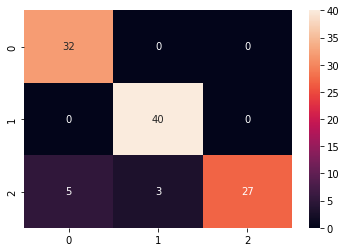

In [20]:
sns.heatmap(confusion_matrix(ytest,pred1), annot = True, fmt = '0.5g')

In [21]:
clf2.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('model', AdaBoostClassifier())])

In [22]:
pred2=clf2.predict(xtest)
pred2

array(['euthanized', 'euthanized', 'euthanized', 'died', 'euthanized',
       'died', 'lived', 'euthanized', 'euthanized', 'died', 'euthanized',
       'died', 'lived', 'lived', 'lived', 'lived', 'euthanized', 'died',
       'lived', 'died', 'lived', 'died', 'died', 'euthanized',
       'euthanized', 'lived', 'died', 'died', 'died', 'euthanized',
       'died', 'lived', 'lived', 'lived', 'euthanized', 'died', 'lived',
       'lived', 'lived', 'lived', 'lived', 'lived', 'died', 'lived',
       'lived', 'euthanized', 'euthanized', 'lived', 'euthanized',
       'euthanized', 'lived', 'died', 'died', 'euthanized', 'lived',
       'euthanized', 'euthanized', 'lived', 'euthanized', 'lived',
       'lived', 'died', 'euthanized', 'lived', 'euthanized', 'lived',
       'euthanized', 'died', 'euthanized', 'euthanized', 'euthanized',
       'died', 'lived', 'euthanized', 'died', 'died', 'euthanized',
       'lived', 'died', 'died', 'died', 'euthanized', 'euthanized',
       'died', 'euthanized', 

In [23]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

        died       0.68      0.66      0.67        32
  euthanized       0.84      0.78      0.81        40
       lived       0.54      0.60      0.57        35

    accuracy                           0.68       107
   macro avg       0.68      0.68      0.68       107
weighted avg       0.69      0.68      0.69       107



<AxesSubplot:>

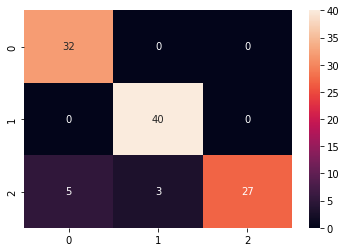

In [24]:
sns.heatmap(confusion_matrix(ytest,pred1), annot = True, fmt = '0.5g')

In [25]:
clf3.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ExtraTreesClassifier())])

In [33]:
pred3=clf3.predict(xtest)
pred3

array(['euthanized', 'euthanized', 'euthanized', 'died', 'euthanized',
       'died', 'died', 'euthanized', 'lived', 'died', 'euthanized',
       'lived', 'lived', 'died', 'lived', 'lived', 'euthanized', 'lived',
       'died', 'died', 'lived', 'died', 'lived', 'euthanized',
       'euthanized', 'euthanized', 'died', 'lived', 'died', 'died',
       'died', 'lived', 'euthanized', 'euthanized', 'euthanized', 'died',
       'euthanized', 'euthanized', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'euthanized', 'died', 'euthanized', 'euthanized',
       'died', 'lived', 'euthanized', 'died', 'lived', 'died', 'lived',
       'lived', 'euthanized', 'euthanized', 'lived', 'euthanized', 'died',
       'lived', 'lived', 'euthanized', 'lived', 'euthanized',
       'euthanized', 'euthanized', 'died', 'euthanized', 'euthanized',
       'euthanized', 'died', 'lived', 'euthanized', 'lived', 'died',
       'euthanized', 'died', 'died', 'died', 'died', 'lived',
       'euthanized', 'died', 

In [34]:
print(classification_report(ytest,pred3))

              precision    recall  f1-score   support

        died       0.85      0.88      0.86        32
  euthanized       1.00      1.00      1.00        40
       lived       0.88      0.86      0.87        35

    accuracy                           0.92       107
   macro avg       0.91      0.91      0.91       107
weighted avg       0.92      0.92      0.92       107



<AxesSubplot:>

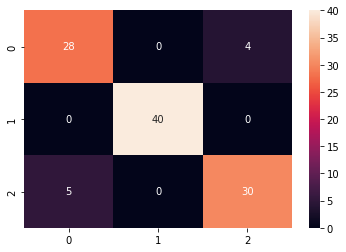

In [35]:
sns.heatmap(confusion_matrix(ytest,pred3), annot = True, fmt = '0.5g')

In [36]:
clf4.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [37]:
pred4=clf4.predict(xtest)
pred4

array(['euthanized', 'euthanized', 'euthanized', 'died', 'euthanized',
       'died', 'died', 'euthanized', 'lived', 'died', 'died', 'died',
       'euthanized', 'died', 'lived', 'lived', 'euthanized', 'died',
       'died', 'died', 'lived', 'died', 'lived', 'euthanized',
       'euthanized', 'euthanized', 'died', 'died', 'died', 'euthanized',
       'died', 'lived', 'euthanized', 'euthanized', 'euthanized', 'died',
       'euthanized', 'euthanized', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'euthanized', 'died', 'euthanized', 'euthanized',
       'died', 'lived', 'euthanized', 'died', 'lived', 'died',
       'euthanized', 'lived', 'euthanized', 'euthanized', 'lived',
       'euthanized', 'died', 'died', 'lived', 'euthanized', 'lived',
       'euthanized', 'euthanized', 'euthanized', 'died', 'euthanized',
       'euthanized', 'lived', 'died', 'lived', 'euthanized', 'lived',
       'died', 'euthanized', 'died', 'died', 'died', 'died', 'euthanized',
       'euthanized', 'd

In [38]:
print(classification_report(ytest,pred4))

              precision    recall  f1-score   support

        died       0.78      0.97      0.86        32
  euthanized       0.90      0.90      0.90        40
       lived       0.96      0.74      0.84        35

    accuracy                           0.87       107
   macro avg       0.88      0.87      0.87       107
weighted avg       0.88      0.87      0.87       107



<AxesSubplot:>

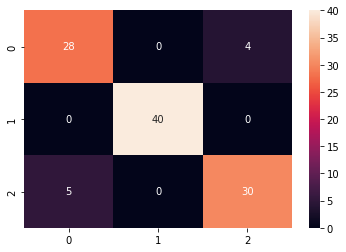

In [39]:
sns.heatmap(confusion_matrix(ytest,pred3), annot = True, fmt = '0.5g')